<a href="https://colab.research.google.com/github/Anisha-bhola/lab/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#"Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands."

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pandas matplotlib seaborn nltk wordcloud textblob

In [4]:
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
df=pd.read_csv('twitter_training.csv')
print(df)

       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partiti

In [9]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
df.columns

Index(['im getting on borderlands and i will murder you all ,',
       'Sentiment_Score', 'Sentiment'],
      dtype='object')

In [13]:
df = df[['im getting on borderlands and i will murder you all ,']].dropna()

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment_Score'] = df['im getting on borderlands and i will murder you all ,'].apply(get_sentiment)

df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

/tmp/ipython-input-15-1817910376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


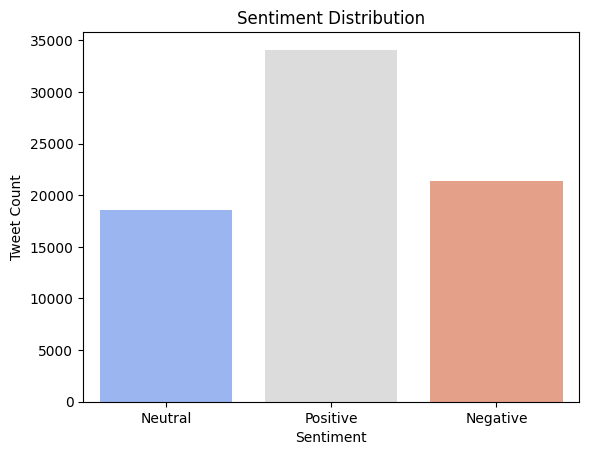

In [15]:
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

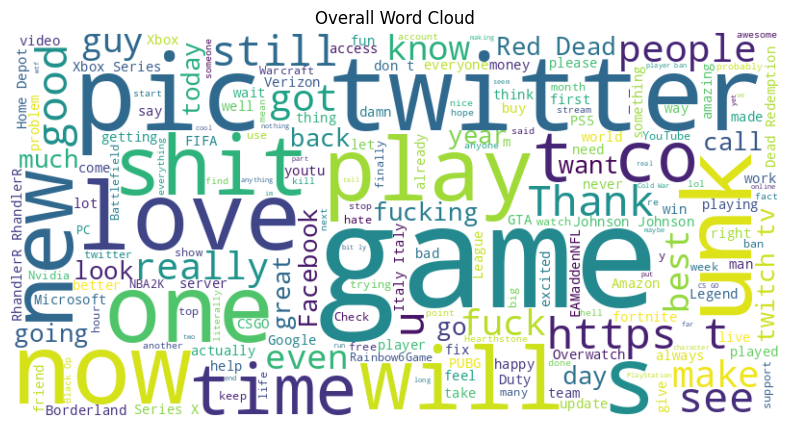

In [17]:
all_words = ' '.join(df['im getting on borderlands and i will murder you all ,'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Word Cloud")
plt.show()

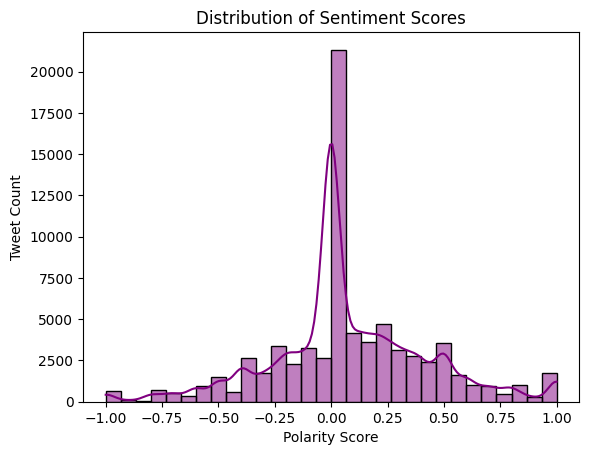

In [18]:
sns.histplot(df['Sentiment_Score'], bins=30, kde=True, color='purple')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Tweet Count")
plt.show()

In [19]:
print(df['Sentiment'].value_counts(normalize=True) * 100)
print("\nAverage Sentiment Score:", df['Sentiment_Score'].mean())

Sentiment
Positive    46.059869
Negative    28.856004
Neutral     25.084127
Name: proportion, dtype: float64

Average Sentiment Score: 0.0767898387761344
